In [3]:
import pandas as pd
import requests
import json
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [4]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&id=44147844'

vistis_url = url + visits

vistis_request = requests.get(vistis_url)

json_data = json.loads(vistis_request.text)

In [6]:
[(i['dimensions'][0]['name'], 
  i['metrics'][0]) for i in json_data['data']]

[('2024-01-09', 807.0),
 ('2024-01-08', 722.0),
 ('2024-01-04', 713.0),
 ('2024-01-05', 632.0),
 ('2024-01-07', 620.0),
 ('2024-01-06', 614.0),
 ('2024-01-10', 518.0)]

In [5]:
y_df = pd.DataFrame([(i['dimensions'][0]['name'], 
  i['metrics'][0]) for i in json_data['data']], columns=['date', 
                                                        'visits'])
y_df

,date,visits
0,2024-01-09,807.0
1,2024-01-08,722.0
2,2024-01-04,713.0
3,2024-01-05,632.0
4,2024-01-07,620.0
5,2024-01-06,614.0
6,2024-01-10,518.0


In [ ]:
spreadsheet_name = 'A new spreadsheet'
sheet = 'Yandex_visits'
d2g.upload(y_df, spreadsheet_name, sheet, credentials=credentials, row_names=True)

In [ ]:
#   step 2

In [ ]:
# Считайте данные из Google Sheets, которые находятся по этой ссылке при помощи библиотеки requests. 
# Посчитайте процент мужчин среди всех посетителей сайта, округлите ответ до целых.

In [41]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests



In [13]:
link = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/users-Лист1.csv'

In [ ]:
req = requests.get(link)
data = req.content
df = pd.read_csv(BytesIO(data))
df

In [21]:
df = pd.read_csv(link)
df 

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [39]:
round((df.query("gender=='male'").users.sum()/df.users.sum()*100), 0)

41.0

In [ ]:
# step 3 

In [ ]:
# Скачайте файл с данными посещаемости сайта Яндекс.Метрика отсюда (сохранен в переменную df). 
# При помощи функции np.where создайте серию, в которую будет записываться 1,
# если посещения были сделаны роботами с браузера, содержащего Chrome в названии, и 0 в других случаях. 
# Поместите получившуюся серию в переменную chrome_robots.

In [44]:
link = 'https://disk.yandex.ru/d/NU25PVVkxIEEtw'
req = requests.get(link)
data = req.content


In [45]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/7_browser.csv')
df.head()

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15


In [48]:
df1 = (df.user_type == 'Robots')&(df.browser.str.contains('Chrome'))
df1

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
dtype: bool

In [51]:
chrome_robots = pd.Series(np.where(df1, 1, 0))
chrome_robots

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
dtype: int64

In [52]:
#    step 4

In [ ]:
# У вас есть датасет с данными о кликах и показах по объявлению, в котором есть пропуски. 
# Вычислите количество строк без пропусков в колонке click_type. 
# Запишите ответ в переменную not_nan_count

In [53]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/sample_ads.csv')
df.head()

,ad_id,user_id,click_type
0,12345,qwert,top
1,12345,fsssc,center
2,12345,vfvgg,NaN
3,12345,asrvv,NaN
4,12345,tynuy,top


In [56]:
not_nan_count = df.click_type.notna().sum()
not_nan_count

11

In [ ]:
# step 5

In [ ]:
# В списке lst находятся различные элементы. Создайте список new_list и сделайте следующее:
# при помощи конструкции try except и цикла попробуйте преобразовать каждое значение в листе в int
# если это получилось – добавьте преобразованное значение  в список new_list

In [6]:
lst = ['12', 'dfd', '125', 'gh', '126', '124', '132']

In [7]:
new_list = []

In [8]:
for i in lst:
    try:
        a = int(i)
        new_list.append(a)
    except:
        continue
print(new_list)    

[12, 125, 126, 124, 132]


In [ ]:
# step 6
А теперь попробуем воспользоваться знаниями использования Telegram API. 
Отправьте себе в личку любое послание, а в ответ к этому шагу напишите ник бота, 
от имени которого будете отправлять сообщения.

In [ ]:
#   Отправка сообщений  TelegramBot

In [1]:
import requests
import json
from urllib.parse import urlencode


token = '6895340302:AAGDx6NQTtdHmRi67tDYr3zGONg2SaKx-7E'
chat_id = 491276802  # your chat id

message = 'Thank you!'  # text which you want to send

params = {'chat_id': chat_id, 'text': message}

base_url = f'https://api.telegram.org/bot{token}/'
url = base_url + 'sendMessage?' + urlencode(params)
# Only if you need it
# proxy = {'https': 'https://77.48.23.199:57842'}

# To send request via proxy
# resp = requests.get(url, proxies=proxy)
resp = requests.get(url)

In [ ]:
#   Отправка документов   TelegramBot

In [29]:
# Path to necessary file
filepath = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/IMG_20231023_092755.jpg'

url = base_url + 'sendDocument?' + urlencode(params)

files = {'document': open(filepath, 'rb')}

# If you need proxy
# resp = requests.get(url, files=files, proxies=proxy)
resp = requests.get(url, files=files)

In [9]:
some_json = 'xxx'
# Convert json to python dict
json_data = json.loads(some_json)
json_data 

AttributeError: 'str' object has no attribute 'text'

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Минипроект 7

In [14]:
# step_1_lesson_7
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_1_lesson_7.csv')
df1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


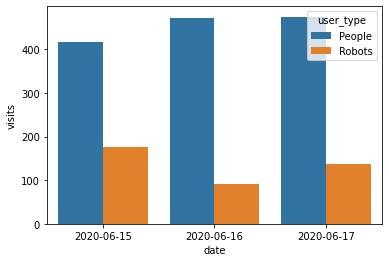

In [15]:
#  Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

sns.barplot(x=df1.date, y=df1.visits, hue = df1.user_type)

In [16]:
# step_2_lesson_7

df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_2_lesson_7.csv')
df2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [24]:
#  Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

round((df2.query("browser=='Google Chrome'").visits.sum()/df2.visits.sum()*100), 0)

60.0

In [65]:
# step_3_lesson_7

df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_3_lesson_7.csv')
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [70]:
#  у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере

rob_visits = df3.query("user_type=='Robots'").groupby(['browser'], as_index=False).agg({'visits':'sum'})
rob_visits

,browser,visits
0,Chromium,1.0
1,Edge,1.0
2,Firefox,31.0
3,Google Chrome,104.0
4,Mobile Safari,1.0
5,Opera,5.0
6,Safari,22.0
7,Samsung Internet,1.0
8,UCWEB,4.0
9,Yandex Browser,7.0
